# 3. Feature Engineering (with Visuals)
This notebook adds and visualizes new features.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load cleaned data
df = pd.read_csv("processed_cleveland_clean.csv")

##Initial Distributions of Key Features

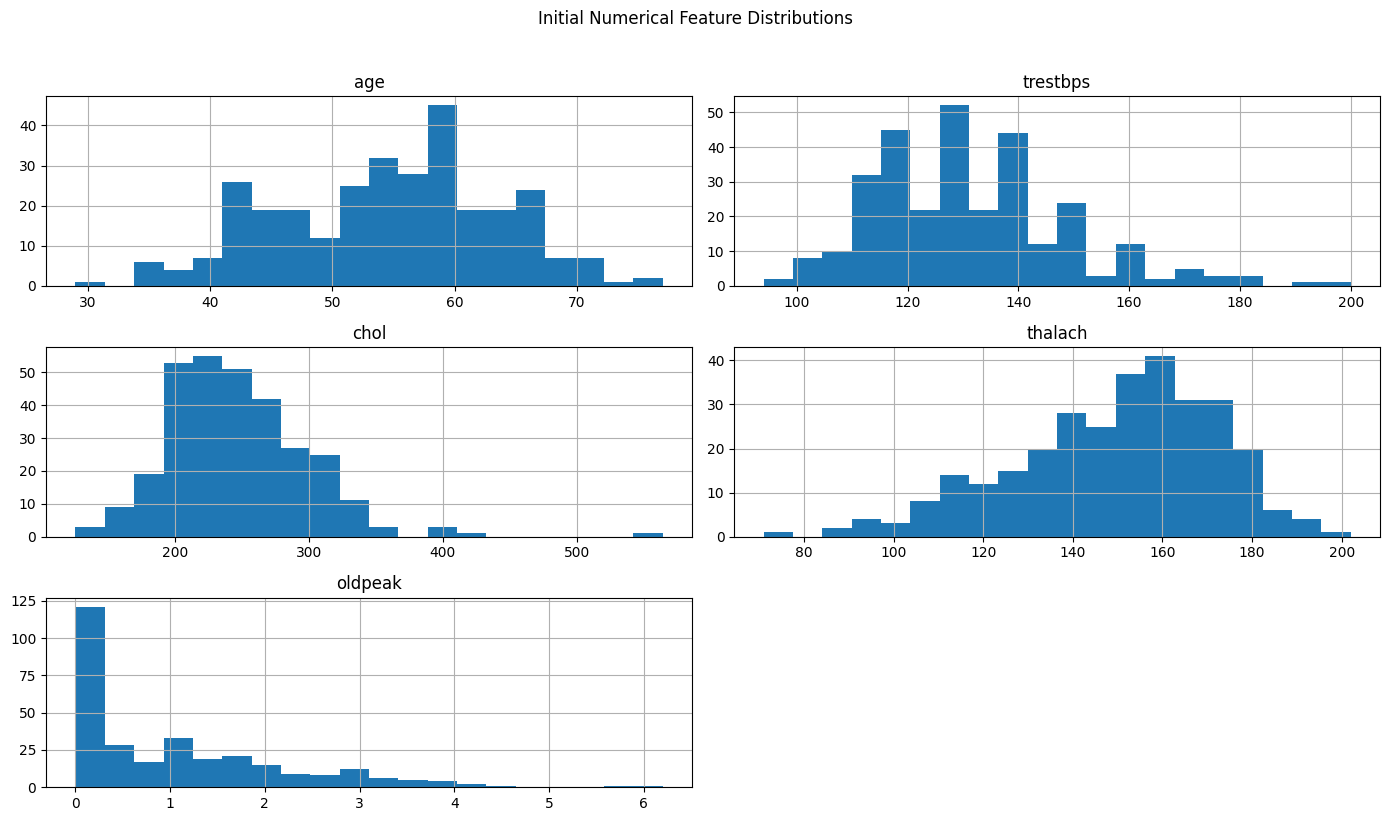

In [3]:
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[num_cols].hist(bins=20, figsize=(14, 8))
plt.suptitle("Initial Numerical Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()

##Add Engineered Features

In [4]:
df["chol_per_age"] = df["chol"] / df["age"]
df["stress_index"] = df["thalach"] / (df["oldpeak"] + 1)
df["bp_dev"] = df["trestbps"] - 120
df["age_bucket"] = pd.cut(df["age"], bins=[29, 40, 55, 70, 100], labels=[0, 1, 2, 3])
df = pd.get_dummies(df, columns=["age_bucket"], drop_first=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol_per_age,stress_index,bp_dev,age_bucket_1,age_bucket_2,age_bucket_3
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,3.698413,45.454545,25.0,False,True,False
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,4.268657,43.200000,40.0,False,True,False
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,3.417910,35.833333,0.0,False,True,False
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,6.756757,41.555556,10.0,False,False,False
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,4.975610,71.666667,10.0,True,False,False


##Distributions of Engineered Features

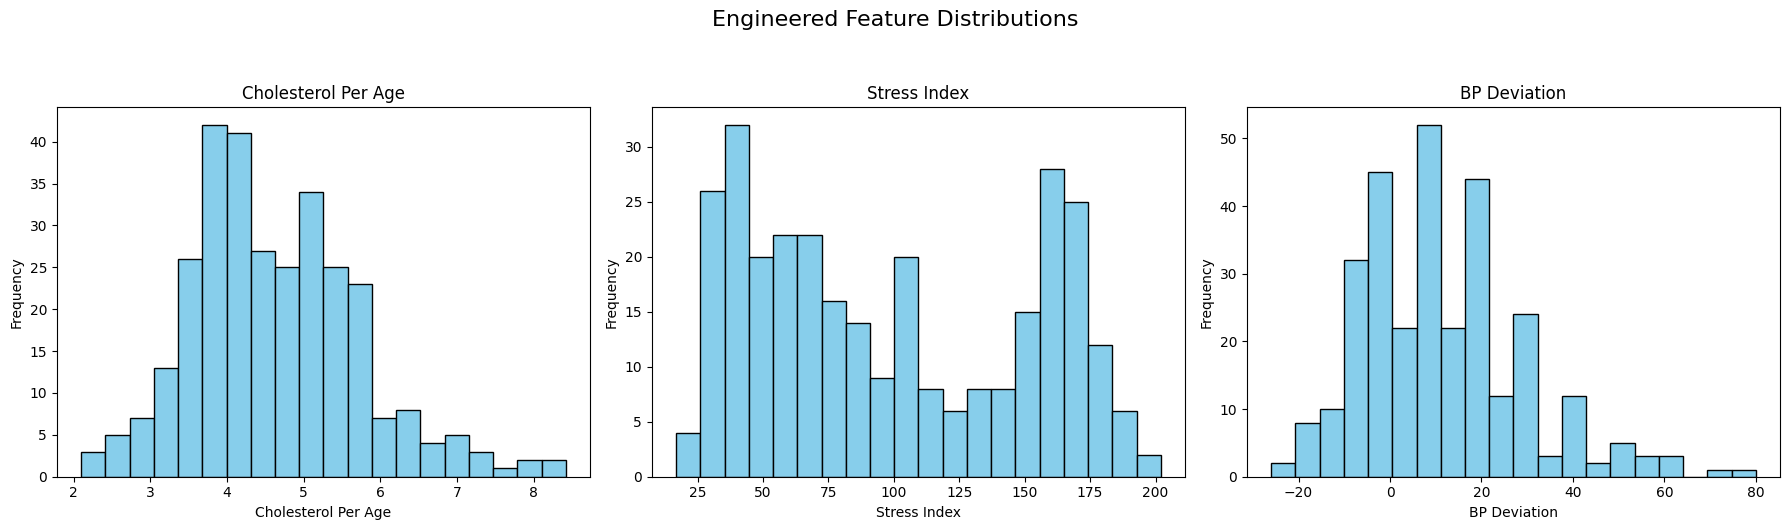

In [11]:
import matplotlib.pyplot as plt

eng_cols = {
    "chol_per_age": "Cholesterol Per Age",
    "stress_index": "Stress Index",
    "bp_dev": "BP Deviation"
}

# Create custom subplots with proper titles
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (col, label) in zip(axes, eng_cols.items()):
    ax.hist(df[col], bins=20, color="skyblue", edgecolor="black")
    ax.set_title(label)
    ax.set_xlabel(label)
    ax.set_ylabel("Frequency")

plt.suptitle("Engineered Feature Distributions", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

##Boxplots by Target

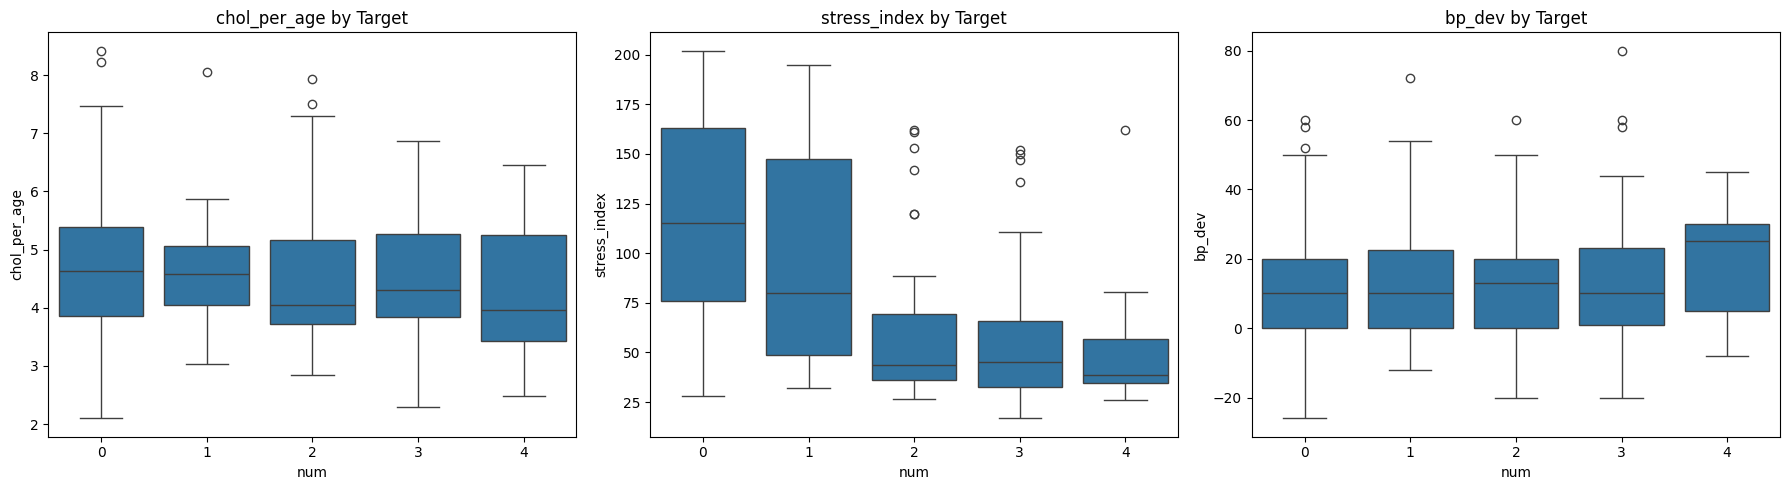

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(eng_cols):
    sns.boxplot(data=df, x='num', y=col, ax=axes[i])
    axes[i].set_title(f"{col} by Target")
plt.tight_layout()
plt.show()

##Scale Numerical Features

In [14]:
scale_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak',
              'chol_per_age', 'stress_index', 'bp_dev']
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol_per_age,stress_index,bp_dev,age_bucket_1,age_bucket_2,age_bucket_3
0,0.948726,1.0,1.0,0.757525,-0.264900,1.0,2.0,0.017197,0.0,1.087338,3.0,0.0,6.0,0,-0.846084,-1.016799,0.757525,False,True,False
1,1.392002,1.0,4.0,1.611220,0.760415,0.0,2.0,-1.821905,1.0,0.397182,2.0,3.0,3.0,2,-0.329103,-1.059948,1.611220,False,True,False
2,1.392002,1.0,4.0,-0.665300,-0.342283,0.0,2.0,-0.902354,1.0,1.346147,2.0,2.0,7.0,1,-1.100386,-1.200934,-0.665300,False,True,False
3,-1.932564,1.0,3.0,-0.096170,0.063974,0.0,0.0,1.637359,0.0,2.122573,3.0,0.0,3.0,0,1.926599,-1.091420,-0.096170,False,False,False
4,-1.489288,0.0,2.0,-0.096170,-0.825922,0.0,2.0,0.980537,0.0,0.310912,1.0,0.0,3.0,0,0.311818,-0.515143,-0.096170,True,False,False


##Save Feature-Engineered Dataset

In [ ]:
df.to_csv("engineered_heart_data.csv", index=False)
print("✅ Feature engineered data saved as 'engineered_heart_data.csv'")